# Effect of Wickets Falling on the Outcome

Even though the T20 is a relatively new and fast paced game, the basics in cricket still seems to apply here. More wickets, less number of batsman left, higher pressure induced, partnerships breaking, eventually result in lower scores. This is to explore if there's any truth behind it.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('../Data/selected_data/merged_data.csv')
data.info()

C:\Users\kaush\AppData\Local\Temp\ipykernel_13640\1736518648.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../Data/selected_data/merged_data.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217242 entries, 0 to 217241
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           217242 non-null  int64  
 1   batter               217242 non-null  object 
 2   bowler               217242 non-null  object 
 3   non_striker          217242 non-null  object 
 4   runs_by_bat          217242 non-null  int64  
 5   extra_runs           217242 non-null  int64  
 6   total_runs_delivery  217242 non-null  int64  
 7   current_team_total   217242 non-null  int64  
 8   runs_remain          217117 non-null  float64
 9   batter_runs          217242 non-null  int64  
 10  balls_faced          217242 non-null  int64  
 11  wickets_fallen       217242 non-null  int64  
 12  delivery             217242 non-null  int64  
 13  over                 217242 non-null  int64  
 14  extra_type           217242 non-null  object 
 15  wicket_type      

Preparing data

In [5]:
# Drop the columns that are not needed
columns_needed = ['match_id', 'over', 'delivery', 'wickets_fallen','current_team_total', 'final_team_total', 'innings', 'year', 'batting_team', 'winning_team']
wickets_data = data[columns_needed]

# in each match, each innings find the over and the delivery in which the wicket fell 
gp = wickets_data.groupby(['match_id', 'innings', 'wickets_fallen']).first().reset_index()

# get rid of wickets_fallen = 0 as they are not needed
gp = gp[gp.wickets_fallen != 0]

# create a new column indicating won or lost status
gp['won'] = gp['batting_team'] == gp['winning_team']

# drop 'batting_team' and 'winning_team' columns
gp = gp.drop(['batting_team', 'winning_team'], axis=1)

# maximum delivery number wil be limited to 6
gp['delivery'] = np.where(gp['delivery'] > 6, 6, gp['delivery'])

# add ball number column = overs * 6 + delivery
gp['ball_number'] = gp['over'] * 6 + gp['delivery']

# get rid of erroenoues data wickets_fallen > 10
gp = gp[gp.wickets_fallen <= 10]

wickets_data = gp
wickets_data.head(20)

,match_id,innings,wickets_fallen,over,delivery,current_team_total,final_team_total,year,won,ball_number
1,Afghanistan_Bangladesh_2018-06-03,1,1,8,3,62,167,2018,True,51
2,Afghanistan_Bangladesh_2018-06-03,1,2,11,6,86,167,2018,True,72
3,Afghanistan_Bangladesh_2018-06-03,1,3,13,2,90,167,2018,True,80
4,Afghanistan_Bangladesh_2018-06-03,1,4,13,5,91,167,2018,True,83
5,Afghanistan_Bangladesh_2018-06-03,1,5,17,6,135,167,2018,True,108
6,Afghanistan_Bangladesh_2018-06-03,1,6,19,3,160,167,2018,True,117
7,Afghanistan_Bangladesh_2018-06-03,1,7,19,5,161,167,2018,True,119
8,Afghanistan_Bangladesh_2018-06-03,1,8,19,6,161,167,2018,True,120
9,Afghanistan_Bangladesh_2018-06-03,2,1,0,1,0,122,2018,False,1
10,Afghanistan_Bangladesh_2018-06-03,2,2,3,4,21,122,2018,False,22


over
0      437
1      495
2      548
3      540
4      543
5      525
6      428
7      442
8      476
9      461
10     549
11     485
12     564
13     589
14     616
15     658
16     699
17     768
18     871
19    1009
dtype: int64


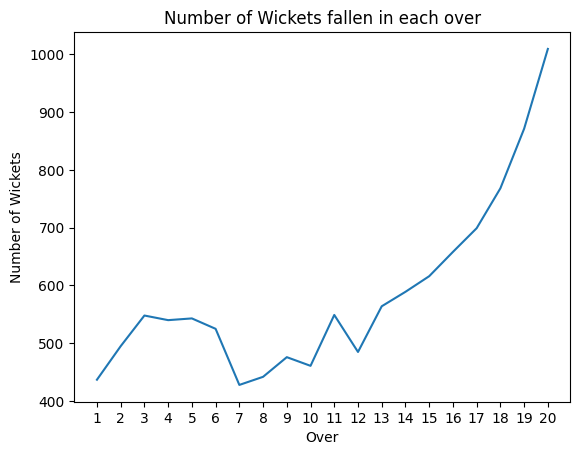

In [10]:
# # group by match_id and innnings. and count the number of total innings
# total_innings = wickets_data.groupby(['match_id', 'innings']).first().reset_index().index.size

# Count the number of wickets fallen in each over
# group by over, extract the number of overs and count the number of wickets fallen in each over

over_wickets = wickets_data.groupby('over').size() 
print(over_wickets)

# increment over number by 1
over_wickets.index = over_wickets.index + 1

# plot the number of wickets fallen in each over
plt.plot(over_wickets)
plt.xlabel('Over')
plt.xticks(np.arange(1, 21, 1))
plt.ylabel('Number of Wickets')
plt.title('Number of Wickets fallen in each over')
plt.show()




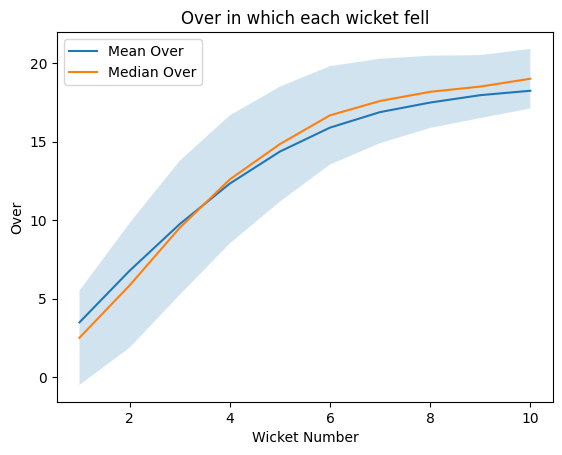

In [61]:
# Finding the median value of over in which each wicket fell
# add a ball number 

gp = wickets_data.groupby(['wickets_fallen'])['ball_number'] 
# divide by 6 to get the over number
median_over = gp.median() / 6
mean_over = gp.mean() / 6
std = gp.std() / 6


# plot the median over in which each wicket fell with standard deviation using fill between
plt.plot(mean_over, label='Mean Over')
plt.plot(median_over, label='Median Over')
plt.legend()
plt.fill_between(median_over.index, median_over - std, median_over + std, alpha=0.2)
plt.xlabel('Wicket Number')
plt.ylabel('Over')
plt.title('Over in which each wicket fell')
plt.show()


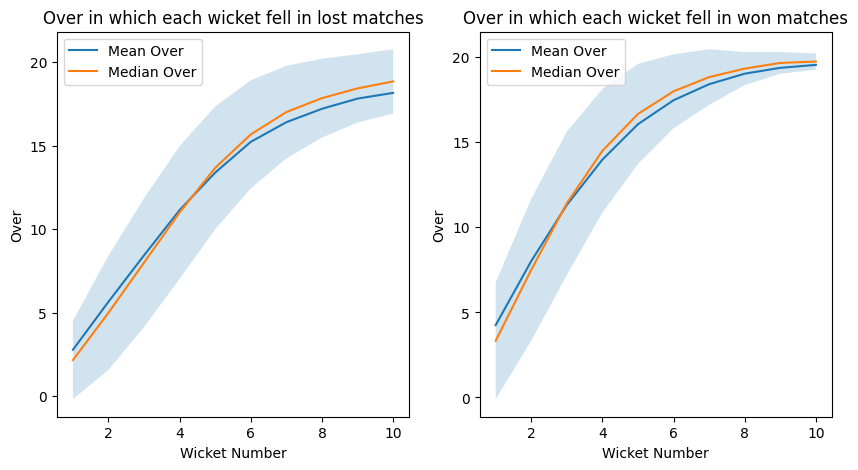

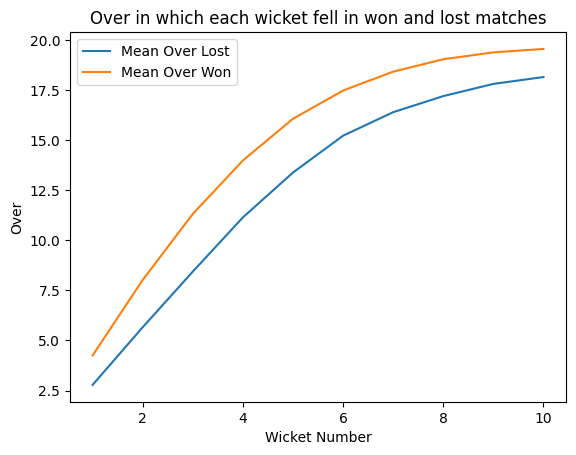

In [66]:
# The same now separately for won and loss matches
# won is a boolean column, so we can group by won and wickets_fallen
gp = wickets_data.groupby(['won', 'wickets_fallen'])['ball_number']
median_over = gp.median() / 6
mean_over = gp.mean() / 6
std = gp.std() / 6

# plot the median over in which each wicket fell with standard deviation using fill between
# subplots for won and lost matches
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(mean_over[False], label='Mean Over')
plt.plot(median_over[False], label='Median Over')
plt.legend()
plt.fill_between(median_over[False].index, median_over[False] - std[False], median_over[False] + std[False], alpha=0.2)
plt.xlabel('Wicket Number')
plt.ylabel('Over')
plt.title('Over in which each wicket fell in lost matches')

plt.subplot(1, 2, 2)
plt.plot(mean_over[True], label='Mean Over')
plt.plot(median_over[True], label='Median Over')
plt.legend()
plt.fill_between(median_over[True].index, median_over[True] - std[True], median_over[True] + std[True], alpha=0.2)
plt.xlabel('Wicket Number')
plt.ylabel('Over')
plt.title('Over in which each wicket fell in won matches')
plt.show()


# new plot in the same figure
plt.plot(mean_over[False], label='Mean Over Lost')
plt.plot(mean_over[True], label='Mean Over Won')
plt.legend()
plt.xlabel('Wicket Number')
plt.ylabel('Over')
plt.title('Over in which each wicket fell in won and lost matches')
plt.show()




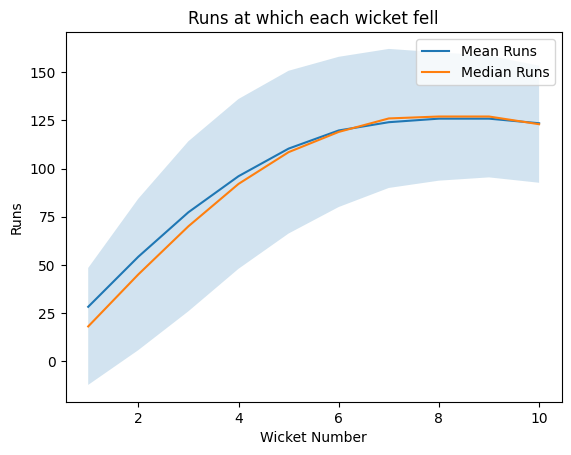

In [62]:
# runs at each wicket fell
gp = wickets_data.groupby(['wickets_fallen'])['current_team_total']
median_runs = gp.median()
mean_runs = gp.mean()
std = gp.std()

# plot the median runs at which each wicket fell with standard deviation using fill between
plt.plot(mean_runs, label='Mean Runs')
plt.plot(median_runs, label='Median Runs')
plt.legend()
plt.fill_between(median_runs.index, median_runs - std, median_runs + std, alpha=0.2)
plt.xlabel('Wicket Number')
plt.ylabel('Runs')
plt.title('Runs at which each wicket fell')
plt.show()


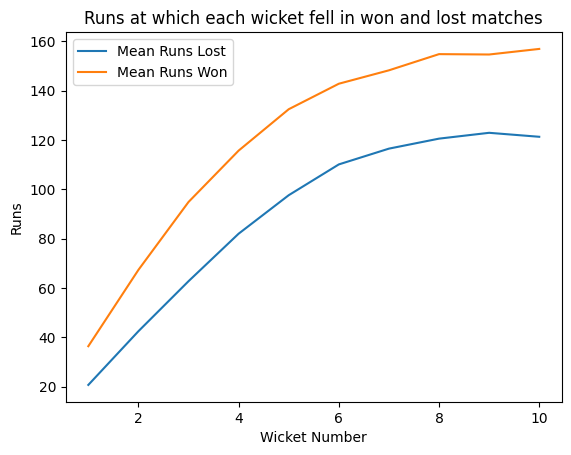

In [67]:
# same for won and lost matches
gp = wickets_data.groupby(['won', 'wickets_fallen'])['current_team_total']
median_runs = gp.median()
mean_runs = gp.mean()
std = gp.std()

# both curves in the same plot
plt.plot(mean_runs[False], label='Mean Runs Lost')
plt.plot(mean_runs[True], label='Mean Runs Won')
plt.legend()
plt.xlabel('Wicket Number')
plt.ylabel('Runs')
plt.title('Runs at which each wicket fell in won and lost matches')
plt.show()